In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os

def extract_color_stats(image):
    (R, G, B) = image.split()
    features = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
                np.std(G), np.std(B)]
    return features


models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm": SVC(kernel="linear"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    "mlp": MLPClassifier()
}


print("[INFO] extracting image features...")
imagePaths = paths.list_images("./3scenes")
data = []
labels = []


for imagePath in imagePaths:
    image = Image.open(imagePath)
    features = extract_color_stats(image)
    data.append(features)
    
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

le = LabelEncoder()
labels = le.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.25)


print(models.keys())
for m in models.keys():
    print("[INFO] using "+m+" model")
    model = models[m]
    model.fit(trainX, trainY)
    print("[INFO] evaluating...")
    predictions = model.predict(testX)
    print(classification_report(testY, predictions, target_names=le.classes_))


[INFO] extracting image features...
dict_keys(['knn', 'naive_bayes', 'logit', 'svm', 'decision_tree', 'random_forest', 'mlp'])
[INFO] using knn model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.72      0.68      0.70        81
      forest       0.85      0.87      0.86        90
     highway       0.68      0.71      0.70        66

    accuracy                           0.76       237
   macro avg       0.75      0.75      0.75       237
weighted avg       0.76      0.76      0.76       237

[INFO] using naive_bayes model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.63      0.42      0.50        81
      forest       0.73      0.80      0.77        90
     highway       0.54      0.70      0.61        66

    accuracy                           0.64       237
   macro avg       0.64      0.64      0.63       237
weighted avg       0.64      0.64      0.63       237

[INFO] using lo

/home/anwar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.76      0.84      0.80        81
      forest       0.91      0.90      0.91        90
     highway       0.83      0.73      0.77        66

    accuracy                           0.83       237
   macro avg       0.83      0.82      0.82       237
weighted avg       0.83      0.83      0.83       237

[INFO] using decision_tree model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.64      0.67      0.65        81
      forest       0.74      0.73      0.74        90
     highway       0.70      0.67      0.68        66

    accuracy                           0.69       237
   macro avg       0.69      0.69      0.69       237
weighted avg       0.69      0.69      0.69       237

[INFO] using random_forest model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.74      0.73      0.73        81


Hasil prediksi gambar rumput : ['forest']


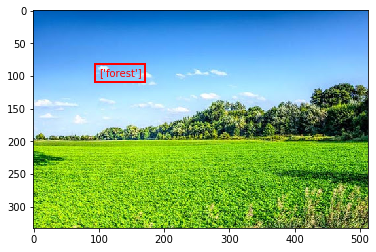

In [24]:
import matplotlib.pyplot as plt
image = Image.open("./rumput.jpg")
f = [extract_color_stats(image)]
model = models["svm"]
pred = model.predict(f)
print("Hasil prediksi gambar rumput : "+ str(le.classes_[pred]))

plt.figure()
plt.imshow(image)
plt.text(100, 100, le.classes_[pred], color='red', bbox=dict(fill=False, edgecolor='red', linewidth=2))
plt.show()